In [45]:
import numpy as np
import time

import pathlib
import requests

# Python Imaging Library > Pillow
import PIL.Image as Image 
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub


In [46]:
IMAGE_SIZE = (224,224)
# Red + Green + Blue (RGB)
IMAGE_SHAPE = IMAGE_SIZE + (3,)

In [47]:
np.set_printoptions(suppress=True) 

In [48]:
IMAGE_SHAPE

(224, 224, 3)

In [49]:
(244,244) + (5,)

(244, 244, 5)

In [50]:
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4" 

In [51]:
model = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=IMAGE_SHAPE),
hub.KerasLayer(model_url),
tf.keras.layers.Softmax()
]) 

In [52]:
# The internet knows the 1,000 classes that ImageNet knows
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
class_names = np.array(open(labels_path).read().splitlines())
class_names[:20] 

16384/10484 [==============================================] - 0s 0us/step


array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock',
       'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco',
       'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie'], dtype='<U30')

In [53]:
image_url = 'https://www.collinsdictionary.com/images/full/goldfish_114645448.jpg'

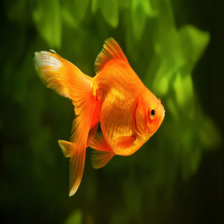

In [54]:
# What image do we want to test?
image_url = 'https://2nhjakvchz41k6pz81rhzd4f-wpengine.netdna-ssl.com/wp-content/uploads/2020/10/gold-fish-1-1024x536.jpg'
filename = 'goldfish.jpg'

# Download the image
response = requests.get(image_url)
with open(filename, "wb") as f:
  f.write(response.content)

# Resize the image to 224x224
img = Image.open(filename).resize(IMAGE_SIZE)
img 

In [55]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

scores = model.predict(img_array)[0]
scores 

array([0.00001759, 0.00014814, 0.9797513 , ..., 0.00000308, 0.00000577,
       0.00001302], dtype=float32)

In [56]:
# What is the index of the biggest score????
pred = np.argmax(scores) 

In [57]:
class_names[pred]

'goldfish'

In [58]:
# Sort all of the predictions from largest to smallest
predictions = np.argsort(scores)[::-1]

# Let's look at the first five
for pred in predictions[:5]:
  prob = scores[pred]
  label = class_names[pred]
  print(f"It is {label} with a probability of {prob:.2%}") 

It is goldfish with a probability of 97.98%
It is axolotl with a probability of 0.03%
It is flamingo with a probability of 0.03%
It is anemone fish with a probability of 0.02%
It is hen with a probability of 0.02%


# Another test

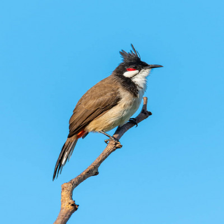

In [59]:
# What image do we want to test?
image_url = 'https://st4.depositphotos.com/6253706/30845/i/450/depositphotos_308452458-stock-photo-red-whiskered-bulbul-perching-on.jpg'
filename = 'test.jpg'

# Download the image and save the image
response = requests.get(image_url)
with open(filename, "wb") as f:
  f.write(response.content)

# Resize the image to 224x224
img = Image.open(filename).resize(IMAGE_SIZE)
img 

In [60]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

scores = model.predict(img_array)[0]
scores 

array([0.00008379, 0.00009484, 0.00003738, ..., 0.00005795, 0.00002978,
       0.0003373 ], dtype=float32)

In [61]:
# What is the index of the biggest score????
pred = np.argmax(scores)
class_names[pred] 

'bulbul'

In [62]:
scores[pred] 

0.9090178

In [63]:
# Sort all of the predictions from largest to smallest
predictions = np.argsort(scores)[::-1]

# Let's look at the first five
for pred in predictions[:5]:
  prob = scores[pred]
  label = class_names[pred]
  print(f"It is {label} with a probability of {prob:.2%}") 

It is bulbul with a probability of 90.90%
It is coucal with a probability of 0.44%
It is bee eater with a probability of 0.32%
It is jay with a probability of 0.14%
It is ruffed grouse with a probability of 0.11%


# Google Images Download

In [64]:
# Install a special version because 
# https://stackoverflow.com/questions/60370799/google-image-download-with-python-cannot-download-images
!pip install git+https://github.com/Joeclinton1/google-images-download.git 

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-mfhpovu5
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-mfhpovu5


In [65]:
from google_images_download import google_images_download

downloader = google_images_download.googleimagesdownload() 

In [66]:
# Single term
search_term = "bagels"

details = {
'limit': 30,
'keywords': search_term,
'format': 'jpg',
'color_type': 'full-color',
'type': 'photo',
'image_directory': search_term.replace(" ","_").lower()
}

downloader.download(details) 


Item no.: 1 --> Item name = bagels
Evaluating...
Starting Download...
Completed Image ====> 1.bagels.jpg
Completed Image ====> 2.img_8813-bagel-recipe.jpg
Completed Image ====> 3.bagelopener009_ndb4x5.jpeg
Completed Image ====> 4.homemade-bagels-lead.jpg
Completed Image ====> 5.homemade-bagels-3.jpg
Completed Image ====> 6.75697881.cms.jpg
Completed Image ====> 7.easy-homemade-bagels-03.jpg
Completed Image ====> 8.nyc+bagels.jpg
Completed Image ====> 9.vegan-bagels.jpg
Completed Image ====> 10.bagels.jpg
Completed Image ====> 11.homemadebagels.jpg
Completed Image ====> 12.homemade-everything-bagels.jpg
Completed Image ====> 13.vegan-bagel-and-lox-18.jpg
Completed Image ====> 14.easy-bagel-recipe-featured.jpg
Completed Image ====> 15.honey-bagels_exps_fbmz16_24385_c05_19_4b.jpg
Completed Image ====> 16.20191219-seo-bagel-recipe-delish-ehg-8846-1578412004.jpg
Completed Image ====> 17.everything-bagels-from-scratch-01.jpg
Completed Image ====> 18.bagel-plain-alt.jpg
Completed Image ====>

({'bagels': ['/content/downloads/bagels/1.bagels.jpg',
   '/content/downloads/bagels/2.img_8813-bagel-recipe.jpg',
   '/content/downloads/bagels/3.bagelopener009_ndb4x5.jpeg',
   '/content/downloads/bagels/4.homemade-bagels-lead.jpg',
   '/content/downloads/bagels/5.homemade-bagels-3.jpg',
   '/content/downloads/bagels/6.75697881.cms.jpg',
   '/content/downloads/bagels/7.easy-homemade-bagels-03.jpg',
   '/content/downloads/bagels/8.nyc+bagels.jpg',
   '/content/downloads/bagels/9.vegan-bagels.jpg',
   '/content/downloads/bagels/10.bagels.jpg',
   '/content/downloads/bagels/11.homemadebagels.jpg',
   '/content/downloads/bagels/12.homemade-everything-bagels.jpg',
   '/content/downloads/bagels/13.vegan-bagel-and-lox-18.jpg',
   '/content/downloads/bagels/14.easy-bagel-recipe-featured.jpg',
   '/content/downloads/bagels/15.honey-bagels_exps_fbmz16_24385_c05_19_4b.jpg',
   '/content/downloads/bagels/16.20191219-seo-bagel-recipe-delish-ehg-8846-1578412004.jpg',
   '/content/downloads/bagels/

In [44]:
# Looping

search_term = ["brazil","france"]

for term in search_term:
  details = {
  'limit': 30,
  'keywords': term,
  'format': 'jpg',
  'color_type': 'full-color',
  'type': 'photo',
  'image_directory': term.replace(" ","_").lower()
  }

  downloader.download(details) 


Item no.: 1 --> Item name = brazil
Evaluating...
Starting Download...
Completed Image ====> 1.02virus-brazil-top-superjumbo-v2.jpg
Completed Image ====> 2.brazil-main-2c6fe18.jpg
Completed Image ====> 3._110794707_gettyimages-590664365.jpg
Completed Image ====> 4.210305150150-copacabana-full-169.jpg
Completed Image ====> 5.brazil-1800x1000.jpg
Completed Image ====> 6.brazil-32887.jpg
Completed Image ====> 7.view-rio-de-janeiro-brazil-skyline-sugar-2008.jpg
Completed Image ====> 8.7addba90-f335-11eb-97f9-89051db5b6c1_image_hires_100547.jpg
Completed Image ====> 9.brazil.jpg
Completed Image ====> 10.20210605_srr_sq.jpg
Completed Image ====> 11.rio.jpg
Completed Image ====> 12.globalpedia-hero-brazil-1-520x450.jpg
Completed Image ====> 13.800.jpeg
Completed Image ====> 14.paradalgbt.jpg
Completed Image ====> 15.fyuukcs5lnk6jnxgn4z4q7c7wu.jpg
Completed Image ====> 16.country_image_brazil.jpg
Completed Image ====> 17.aerial-view-of-famous-copacabana-beach-and-ipanema-beach:cq5dam.web.512.3

In [67]:
data_dir = pathlib.Path("downloads") 
planets = list(data_dir.glob("planet/*"))
planets

[PosixPath('downloads/planet/2.solar_system.jpg'),
 PosixPath('downloads/planet/20.web3-planet-earth-space-nasa-space-stars-sun-shutterstock_526255060-shutterstock.jpg'),
 PosixPath('downloads/planet/4.6bd234d1-d714-4a9d-80f4-b7c730c02062-2060x1236.jpeg'),
 PosixPath('downloads/planet/16.planet-circles-two-stars-nasa-02-ht-jc-200109_hpmain_16x9_992.jpg'),
 PosixPath('downloads/planet/12.planet_1280p.jpg'),
 PosixPath('downloads/planet/5.kepler90planets.jpg'),
 PosixPath('downloads/planet/23.planets-solar-system-isolated-on-260nw-1182369475.jpg'),
 PosixPath('downloads/planet/30.exoplanets.jpg'),
 PosixPath('downloads/planet/9.planets-solar-system-pluto-montage-images-sun.jpg'),
 PosixPath('downloads/planet/21.shutterstock-300203846.jpg'),
 PosixPath('downloads/planet/22.original.jpg'),
 PosixPath('downloads/planet/29.1073_pia16853.jpg'),
 PosixPath('downloads/planet/6.planet-uranus-0519211.jpg'),
 PosixPath('downloads/planet/13.2019-1-ksressay-illo%20v2-wb.jpg'),
 PosixPath('downloads/

In [68]:
# Label by directories name
#  Everything inside the CHOCOLATE folder is... chocolate
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=IMAGE_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=IMAGE_SIZE) 

Found 198 files belonging to 7 classes.
Using 159 files for training.
Found 198 files belonging to 7 classes.
Using 39 files for validation.


In [69]:
class_names = train_ds.class_names

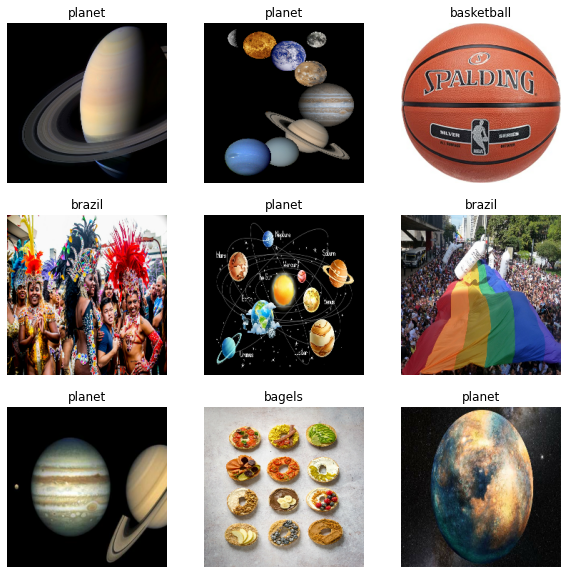

In [70]:
# Let's look at them!!!
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off") 

In [71]:
# Add extra images by transforming the images we DO have
# maybe zoom in a little, rotate a little, flip a little
data_augmentation = tf.keras.Sequential(
[
tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
]
) 

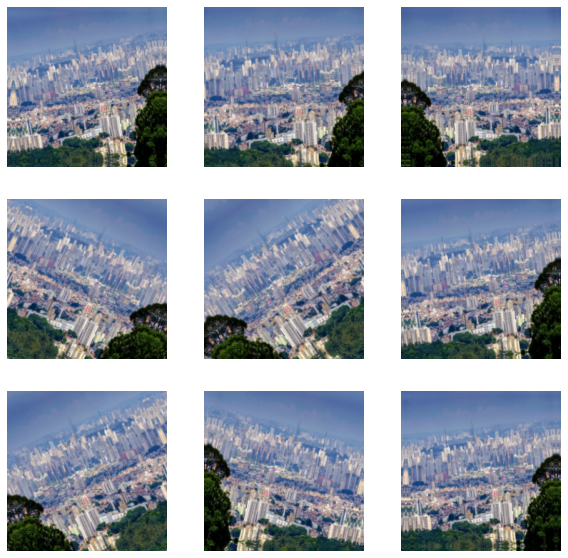

In [72]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off") 

# Let's build a classifier

In [73]:
# Always add this code for image datasets!!!
# It makes it faster!!!!
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [74]:
model = tf.keras.Sequential([
data_augmentation,
tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=IMAGE_SHAPE),
tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(len(class_names), activation='softmax')
]) 
# Conv2D = a lot of convolutional layers
# softmax turns the result in percentage

In [75]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(),
metrics=['accuracy']) 

In [76]:
epochs=50

model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
) 

Epoch 1/50
5/5 [==============================] - 6s 387ms/step - loss: 1.9718 - accuracy: 0.1572 - val_loss: 1.8944 - val_accuracy: 0.2051
Epoch 2/50
5/5 [==============================] - 1s 249ms/step - loss: 1.8558 - accuracy: 0.3459 - val_loss: 1.8391 - val_accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 1s 255ms/step - loss: 1.6812 - accuracy: 0.3585 - val_loss: 1.7249 - val_accuracy: 0.2564
Epoch 4/50
5/5 [==============================] - 1s 250ms/step - loss: 1.4591 - accuracy: 0.3836 - val_loss: 1.6280 - val_accuracy: 0.3077
Epoch 5/50
5/5 [==============================] - 1s 257ms/step - loss: 1.2324 - accuracy: 0.4528 - val_loss: 1.3489 - val_accuracy: 0.4615
Epoch 6/50
5/5 [==============================] - 1s 261ms/step - loss: 1.1298 - accuracy: 0.4969 - val_loss: 1.5387 - val_accuracy: 0.4103
Epoch 7/50
5/5 [==============================] - 1s 253ms/step - loss: 1.1412 - accuracy: 0.5346 - val_loss: 1.6000 - val_accuracy: 0.4103
Epoch 8/50
5/5 [====

200


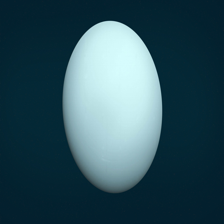

In [77]:
# What image do we want to test?
image_url = 'https://solarsystem.nasa.gov/system/stellar_items/image_files/69_feature_1600x900_uranus_new.jpg'
filename = 'test.jpg'

# Download the image and save the image
response = requests.get(image_url)

# Debuggin if the image doesnt show up
print(response.status_code) 
with open(filename, "wb") as f:
  f.write(response.content)

# Resize the image to 224x224
img = Image.open(filename).resize(IMAGE_SIZE)
img 


In [78]:
np.set_printoptions(suppress=True)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

scores = model.predict(img_array)[0]
scores 

array([0.        , 0.        , 0.00000106, 0.        , 0.0000001 ,
       0.        , 0.9999988 ], dtype=float32)

In [79]:
# Sort all of the predictions from largest to smallest
predictions = np.argsort(scores)[::-1]

# Let's look at the first five
for pred in predictions[:5]:
  prob = scores[pred]
  label = class_names[pred]
  print(f"It is {label} with a probability of {prob:.2%}") 

It is planet with a probability of 100.00%
It is brazil with a probability of 0.00%
It is france with a probability of 0.00%
It is basketball with a probability of 0.00%
It is muffins with a probability of 0.00%


# Testing again

200


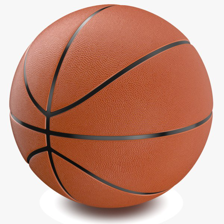

In [80]:
# What image do we want to test?
image_url = 'https://static.turbosquid.com/Preview/001322/693/DT/_600.jpg'
filename = 'test.jpg'

# Download the image and save the image
response = requests.get(image_url)

# Debuggin if the image doesnt show up
print(response.status_code) 
with open(filename, "wb") as f:
  f.write(response.content)

# Resize the image to 224x224
img = Image.open(filename).resize(IMAGE_SIZE)
img 


In [81]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

scores = model.predict(img_array)[0]

# Sort all of the predictions from largest to smallest
predictions = np.argsort(scores)[::-1]

# Let's look at the first five
for pred in predictions[:5]:
  prob = scores[pred]
  label = class_names[pred]
  print(f"It is {label} with a probability of {prob:.2%}") 

It is basketball with a probability of 99.04%
It is bagels with a probability of 0.87%
It is muffins with a probability of 0.09%
It is chocolate with a probability of 0.00%
It is brazil with a probability of 0.00%
